<a href="https://www.kaggle.com/code/yeasirmahmud/uber-traffic?scriptVersionId=242078406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install contextily


importing libraries


In [5]:
uber_df=pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")

In [6]:
print(uber_df.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [7]:
print(uber_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None


The is_holiday feature does not significantly explain the variance in fare_amount — neither statistically nor practically.

In [8]:
print(uber_df.head)
print(uber_df.columns)

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [9]:
weather_df=pd.read_csv("/kaggle/input/weather/weather.csv")

In [10]:
print(weather_df.columns)
print(weather_df.head)


Index(['time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'rain (mm)', 'snowfall (cm)', 'precipitation (mm)',
       'pressure_msl (hPa)', 'weather_code (wmo code)',
       'apparent_temperature (°C)', 'wind_speed_10m (km/h)', 'snow_depth (m)',
       'cloud_cover (%)'],
      dtype='object')
<bound method NDFrame.head of                    time  temperature_2m (°C)  relative_humidity_2m (%)  \
0      2009-06-01T00:00                 20.5                        42   
1      2009-06-01T01:00                 18.2                        40   
2      2009-06-01T02:00                 16.4                        38   
3      2009-06-01T03:00                 15.0                        40   
4      2009-06-01T04:00                 13.8                        43   
...                 ...                  ...                       ...   
54043  2015-07-31T19:00                 30.0                        41   
54044  2015-07-31T20:00                 30.0    

In [11]:
weather_df['time'] = pd.to_datetime(weather_df['time'])  # ensure datetime type
weather_df['time_hour'] = weather_df['time'].dt.floor('H')  # round to hour


/tmp/ipykernel_219/1077841376.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['time_hour'] = weather_df['time'].dt.floor('H')  # round to hour


In [12]:
# First, ensure the column is in datetime format
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])

# Then, round down to the hour
uber_df['pickup_hour'] = uber_df['pickup_datetime'].dt.floor('H')


/tmp/ipykernel_219/1067861708.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  uber_df['pickup_hour'] = uber_df['pickup_datetime'].dt.floor('H')


In [13]:
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df['time_hour'] = weather_df['time'].dt.floor('H')
weather_df['time_hour'] = weather_df['time_hour'].dt.tz_localize('UTC')


/tmp/ipykernel_219/3814619187.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_df['time_hour'] = weather_df['time'].dt.floor('H')


In [14]:
merged_df = uber_df.merge(
    weather_df,
    left_on='pickup_hour',
    right_on='time_hour',
    how='left'
)


In [15]:
merged_df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour', 'time',
       'temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'rain (mm)', 'snowfall (cm)', 'precipitation (mm)',
       'pressure_msl (hPa)', 'weather_code (wmo code)',
       'apparent_temperature (°C)', 'wind_speed_10m (km/h)', 'snow_depth (m)',
       'cloud_cover (%)', 'time_hour'],
      dtype='object')

In [16]:
merged_df.isnull().sum()


Unnamed: 0                       0
key                              0
fare_amount                      0
pickup_datetime                  0
pickup_longitude                 0
pickup_latitude                  0
dropoff_longitude                1
dropoff_latitude                 1
passenger_count                  0
pickup_hour                      0
time                         12784
temperature_2m (°C)          12784
relative_humidity_2m (%)     12784
dew_point_2m (°C)            12784
rain (mm)                    12784
snowfall (cm)                12784
precipitation (mm)           12784
pressure_msl (hPa)           12784
weather_code (wmo code)      12784
apparent_temperature (°C)    12784
wind_speed_10m (km/h)        12784
snow_depth (m)               12784
cloud_cover (%)              12784
time_hour                    12784
dtype: int64

In [17]:
merged_df['bad_weather'] = (
    (merged_df['rain (mm)'] > 0) | 
    (merged_df['snowfall (cm)'] > 0)
)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [18]:

merged_df.groupby('bad_weather')['fare_amount'].mean()


bad_weather
False    11.373428
True     11.269885
Name: fare_amount, dtype: float64

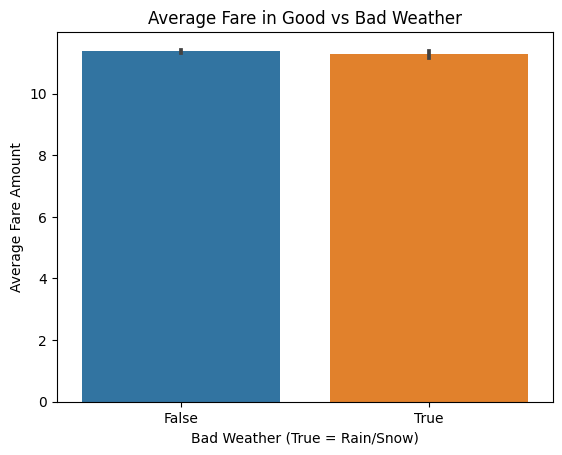

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='bad_weather', y='fare_amount', data=merged_df)
plt.title('Average Fare in Good vs Bad Weather')
plt.xlabel('Bad Weather (True = Rain/Snow)')
plt.ylabel('Average Fare Amount')
plt.show()


In [20]:
print(merged_df.groupby('bad_weather')['fare_amount'].mean())


bad_weather
False    11.373428
True     11.269885
Name: fare_amount, dtype: float64


## Uber Fare vs Bad Weather

- Average fare in **good weather**: $11.37  
- Average fare in **bad weather**: $11.27  

The difference is minimal, indicating **bad weather doesn’t significantly affect Uber fares** in this data.


In [21]:
# Count number of rides by bad_weather status
ride_counts = merged_df['bad_weather'].value_counts()

print(ride_counts)


bad_weather
False    173977
True      26023
Name: count, dtype: int64


bad_weather
False    173977
True      26023
dtype: int64


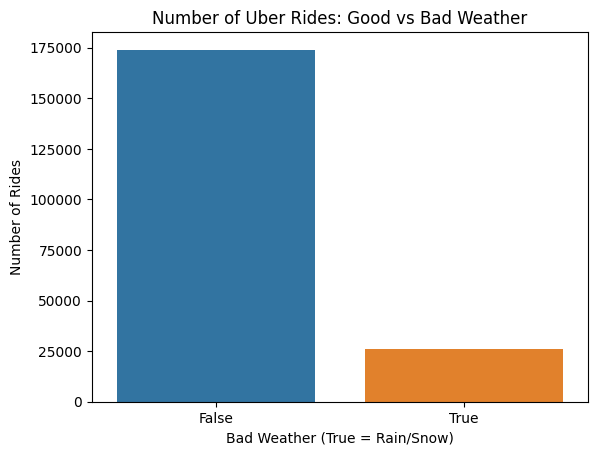

In [22]:
sns.countplot(x='bad_weather', data=merged_df)
ride_counts = merged_df.groupby('bad_weather').size()
print(ride_counts)

plt.title('Number of Uber Rides: Good vs Bad Weather')
plt.xlabel('Bad Weather (True = Rain/Snow)')
plt.ylabel('Number of Rides')
plt.show()


**Uber rides drop significantly in bad weather:**

- Good weather rides: 173,977  
- Bad weather rides: 26,023  

Rides during rain or snow are much fewer, indicating that bad weather reduces Uber usage.


In [23]:
import pandas as pd

# Convert pickup_datetime to datetime and floor to the hour (lowercase 'h')
uber_df['pickup_hour'] = pd.to_datetime(uber_df['pickup_datetime']).dt.floor('h')

# Remove timezone info if exists (make timezone naive)
if uber_df['pickup_hour'].dt.tz is not None:
    uber_df['pickup_hour'] = uber_df['pickup_hour'].dt.tz_convert(None)

# Aggregate Uber data by hour: count rides and average fare
uber_hourly = uber_df.groupby('pickup_hour').agg(
    rides_count=('pickup_hour', 'count'),
    avg_fare=('fare_amount', 'mean')
).reset_index()

# For weather, floor time to hour and remove timezone info (make naive)
weather_df['time_hour'] = pd.to_datetime(weather_df['time']).dt.floor('h')
if weather_df['time_hour'].dt.tz is not None:
    weather_df['time_hour'] = weather_df['time_hour'].dt.tz_convert(None)

# Merge Uber and weather on hour, keep all Uber data (left join)
merged_hourly = pd.merge(
    uber_hourly,
    weather_df,
    left_on='pickup_hour',
    right_on='time_hour',
    how='left'
)

# Drop redundant time_hour column
merged_hourly.drop(columns=['time_hour'], inplace=True)

print(merged_hourly.head())
print(f"Uber pickup_hour range: {uber_hourly['pickup_hour'].min()} to {uber_hourly['pickup_hour'].max()}")
print(f"Weather time_hour range: {weather_df['time_hour'].min()} to {weather_df['time_hour'].max()}")
print(f"Merged data range: {merged_hourly['pickup_hour'].min()} to {merged_hourly['pickup_hour'].max()}")


          pickup_hour  rides_count  avg_fare time  temperature_2m (°C)  \
0 2009-01-01 01:00:00            2     10.75  NaT                  NaN   
1 2009-01-01 02:00:00            5      8.98  NaT                  NaN   
2 2009-01-01 03:00:00            1     17.80  NaT                  NaN   
3 2009-01-01 04:00:00            4      9.80  NaT                  NaN   
4 2009-01-01 05:00:00            1     14.20  NaT                  NaN   

   relative_humidity_2m (%)  dew_point_2m (°C)  rain (mm)  snowfall (cm)  \
0                       NaN                NaN        NaN            NaN   
1                       NaN                NaN        NaN            NaN   
2                       NaN                NaN        NaN            NaN   
3                       NaN                NaN        NaN            NaN   
4                       NaN                NaN        NaN            NaN   

   precipitation (mm)  pressure_msl (hPa)  weather_code (wmo code)  \
0                 NaN       

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [24]:
start_date = weather_df['time_hour'].min()
end_date = weather_df['time_hour'].max()

# Filter merged data to weather date range
merged_filtered = merged_hourly[
    (merged_hourly['pickup_hour'] >= start_date) & 
    (merged_hourly['pickup_hour'] <= end_date)
]

print(merged_filtered.head())
print(f"Filtered merged data range: {merged_filtered['pickup_hour'].min()} to {merged_filtered['pickup_hour'].max()}")


             pickup_hour  rides_count   avg_fare                time  \
3231 2009-06-01 00:00:00            1   8.500000 2009-06-01 00:00:00   
3232 2009-06-01 03:00:00            1  17.300000 2009-06-01 03:00:00   
3233 2009-06-01 05:00:00            1   2.500000 2009-06-01 05:00:00   
3234 2009-06-01 08:00:00            6  10.166667 2009-06-01 08:00:00   
3235 2009-06-01 09:00:00            1  25.500000 2009-06-01 09:00:00   

      temperature_2m (°C)  relative_humidity_2m (%)  dew_point_2m (°C)  \
3231                 20.5                      42.0                7.3   
3232                 15.0                      40.0                1.5   
3233                 12.7                      45.0                1.0   
3234                 10.5                      49.0                0.1   
3235                  9.6                      53.0                0.6   

      rain (mm)  snowfall (cm)  precipitation (mm)  pressure_msl (hPa)  \
3231        0.0            0.0                 0

rain_flag
False    164015
True      23201
Name: rides_count, dtype: int64


/tmp/ipykernel_219/102919884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered['rain_flag'] = merged_filtered['rain (mm)'] > 0


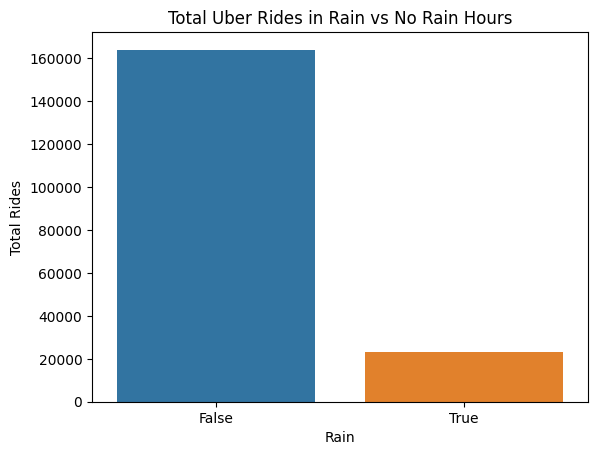

In [25]:
# Create rain indicator (True if rain > 0)
merged_filtered['rain_flag'] = merged_filtered['rain (mm)'] > 0

# Count rides in rain vs no rain
rides_by_rain = merged_filtered.groupby('rain_flag')['rides_count'].sum()

print(rides_by_rain)

# Plot rides count for rain vs no rain
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=rides_by_rain.index.astype(str), y=rides_by_rain.values)
plt.title('Total Uber Rides in Rain vs No Rain Hours')
plt.xlabel('Rain')
plt.ylabel('Total Rides')
plt.show()


In [26]:
merged_filtered.head

<bound method NDFrame.head of               pickup_hour  rides_count   avg_fare                time  \
3231  2009-06-01 00:00:00            1   8.500000 2009-06-01 00:00:00   
3232  2009-06-01 03:00:00            1  17.300000 2009-06-01 03:00:00   
3233  2009-06-01 05:00:00            1   2.500000 2009-06-01 05:00:00   
3234  2009-06-01 08:00:00            6  10.166667 2009-06-01 08:00:00   
3235  2009-06-01 09:00:00            1  25.500000 2009-06-01 09:00:00   
...                   ...          ...        ...                 ...   
51012 2015-06-30 19:00:00            3  11.166667 2015-06-30 19:00:00   
51013 2015-06-30 20:00:00            4   6.875000 2015-06-30 20:00:00   
51014 2015-06-30 21:00:00            4  10.500000 2015-06-30 21:00:00   
51015 2015-06-30 22:00:00            5   8.800000 2015-06-30 22:00:00   
51016 2015-06-30 23:00:00            4  20.250000 2015-06-30 23:00:00   

       temperature_2m (°C)  relative_humidity_2m (%)  dew_point_2m (°C)  \
3231              

In [27]:
# Count missing values per column
missing_counts = merged_filtered.isnull().sum()

# Percentage of missing values per column
missing_percent = (merged_filtered.isnull().mean() * 100).round(2)

# Combine into one DataFrame for clearer view
missing_summary = pd.DataFrame({'Missing Count': missing_counts, 'Missing %': missing_percent})

print(missing_summary)


                           Missing Count  Missing %
pickup_hour                            0        0.0
rides_count                            0        0.0
avg_fare                               0        0.0
time                                   0        0.0
temperature_2m (°C)                    0        0.0
relative_humidity_2m (%)               0        0.0
dew_point_2m (°C)                      0        0.0
rain (mm)                              0        0.0
snowfall (cm)                          0        0.0
precipitation (mm)                     0        0.0
pressure_msl (hPa)                     0        0.0
weather_code (wmo code)                0        0.0
apparent_temperature (°C)              0        0.0
wind_speed_10m (km/h)                  0        0.0
snow_depth (m)                         0        0.0
cloud_cover (%)                        0        0.0
rain_flag                              0        0.0


In [28]:
print(merged_filtered['weather_code (wmo code)'].unique())


[ 0.  2.  1.  3. 53. 51. 55. 61. 63. 65. 71. 73. 75.]


In [29]:
weather_impact = merged_filtered.groupby('weather_code (wmo code)').agg({
    'rides_count': 'sum',
    'avg_fare': 'mean'
}).reset_index()

print(weather_impact)


    weather_code (wmo code)  rides_count   avg_fare
0                       0.0        53052  11.751148
1                       1.0        22658  11.989963
2                       2.0        21293  11.689142
3                       3.0        64190  11.663738
4                      51.0        10215  11.680853
5                      53.0         4648  11.513615
6                      55.0         1682  12.146694
7                      61.0         3380  11.574910
8                      63.0         2088  11.101967
9                      65.0           71   9.413373
10                     71.0         1921  11.776199
11                     73.0         1522  11.516287
12                     75.0          496  13.081448


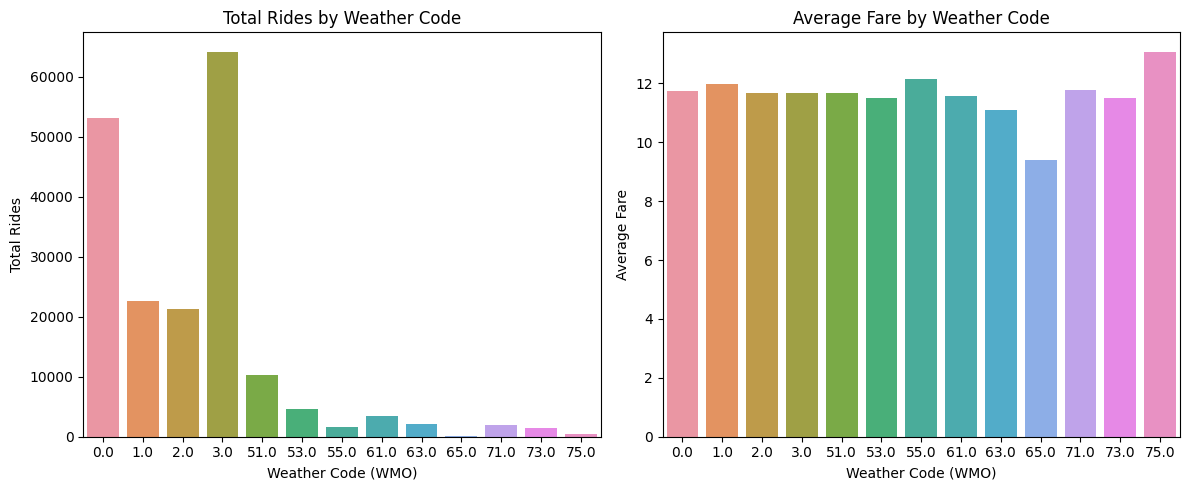

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x='weather_code (wmo code)', y='rides_count', data=weather_impact)
plt.title('Total Rides by Weather Code')
plt.xlabel('Weather Code (WMO)')
plt.ylabel('Total Rides')

plt.subplot(1,2,2)
sns.barplot(x='weather_code (wmo code)', y='avg_fare', data=weather_impact)
plt.title('Average Fare by Weather Code')
plt.xlabel('Weather Code (WMO)')
plt.ylabel('Average Fare')

plt.tight_layout()
plt.show()


In [31]:
# Group total rides by weather_code (weather condition)
rides_by_weather = merged_filtered.groupby('weather_code (wmo code)')['rides_count'].sum().reset_index()

# Map weather codes to descriptive text (only for your reference here)
weather_desc = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Depositing rime fog',
    51: 'Light drizzle',
    53: 'Moderate drizzle',
    55: 'Dense drizzle',
    56: 'Light freezing drizzle',
    57: 'Dense freezing drizzle',
    61: 'Slight rain',
    63: 'Moderate rain',
    65: 'Heavy rain',
    66: 'Light freezing rain',
    67: 'Heavy freezing rain',
    71: 'Slight snow fall',
    73: 'Moderate snow fall',
    75: 'Heavy snow fall',
    77: 'Snow grains',
    80: 'Slight rain showers',
    81: 'Moderate rain showers',
    82: 'Violent rain showers',
    85: 'Slight snow showers',
    86: 'Heavy snow showers',
    95: 'Thunderstorm',
    96: 'Thunderstorm with slight hail',
    99: 'Thunderstorm with heavy hail',
}

# Add description column (you can keep or drop this later)
rides_by_weather['weather_desc'] = rides_by_weather['weather_code (wmo code)'].map(weather_desc)

# Filter out all rain-related weather codes (those containing "rain" or drizzle)
rain_terms = ['rain', 'drizzle']

# Filter out rain weather conditions
non_rain_weather = rides_by_weather[~rides_by_weather['weather_desc'].str.contains('|'.join(rain_terms), case=False, na=False)]

# Sort by total rides descending
non_rain_weather = non_rain_weather.sort_values(by='rides_count', ascending=False)

print(non_rain_weather[['weather_desc', 'rides_count']])


          weather_desc  rides_count
3             Overcast        64190
0            Clear sky        53052
1         Mainly clear        22658
2        Partly cloudy        21293
10    Slight snow fall         1921
11  Moderate snow fall         1522
12     Heavy snow fall          496


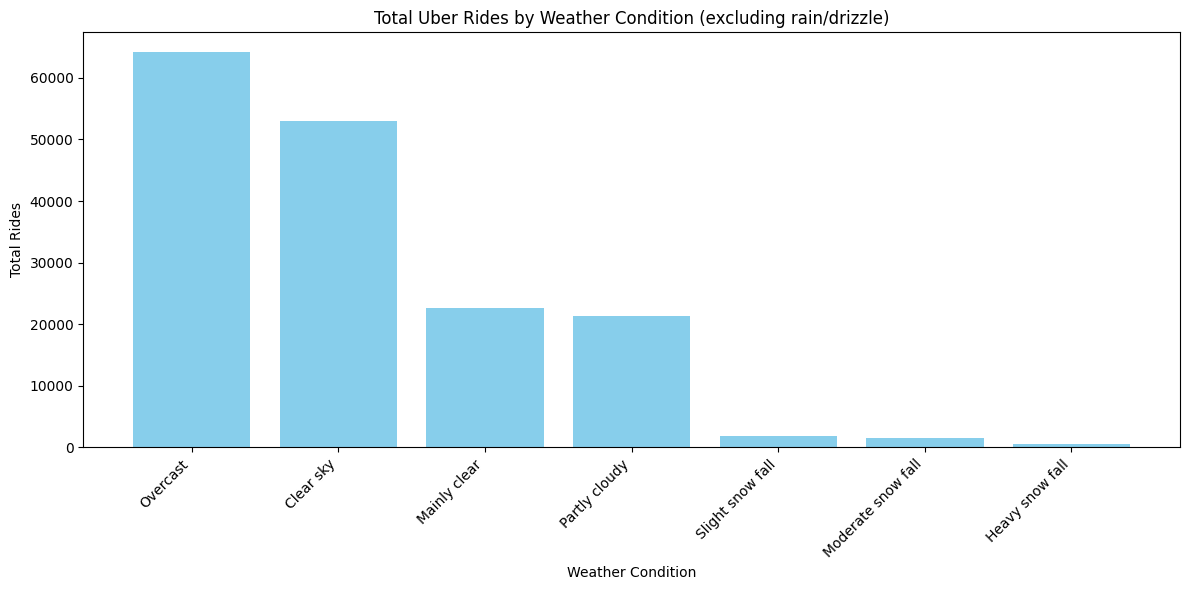

In [32]:
import matplotlib.pyplot as plt

# Assuming you already have 'non_rain_weather' DataFrame from previous step

plt.figure(figsize=(12,6))
plt.bar(non_rain_weather['weather_desc'], non_rain_weather['rides_count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rides')
plt.title('Total Uber Rides by Weather Condition (excluding rain/drizzle)')
plt.tight_layout()
plt.show()


In [33]:
print(uber_df.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour'],
      dtype='object')


In [34]:
print(merged_filtered.columns)

Index(['pickup_hour', 'rides_count', 'avg_fare', 'time', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'dew_point_2m (°C)', 'rain (mm)',
       'snowfall (cm)', 'precipitation (mm)', 'pressure_msl (hPa)',
       'weather_code (wmo code)', 'apparent_temperature (°C)',
       'wind_speed_10m (km/h)', 'snow_depth (m)', 'cloud_cover (%)',
       'rain_flag'],
      dtype='object')


In [35]:
import pandas as pd

# Step 1: Convert datetime columns and remove timezone (tz_localize(None))
uber_df['pickup_hour'] = pd.to_datetime(uber_df['pickup_hour']).dt.tz_localize(None)
weather_df['time_hour'] = pd.to_datetime(weather_df['time']).dt.floor('h').dt.tz_localize(None)

# Step 2: Filter Uber data within weather data's time range
start = weather_df['time_hour'].min()
end = weather_df['time_hour'].max()

uber_filtered = uber_df[
    (uber_df['pickup_hour'] >= start) &
    (uber_df['pickup_hour'] <= end)
].copy()

# Step 3: Optional - round location to reduce unique location combinations
uber_filtered['pickup_lat_rounded'] = uber_filtered['pickup_latitude'].round(2)
uber_filtered['pickup_lon_rounded'] = uber_filtered['pickup_longitude'].round(2)

# Step 4: Group by time and location
grouped_uber = uber_filtered.groupby(
    ['pickup_hour', 'pickup_lat_rounded', 'pickup_lon_rounded']
).agg(
    rides_count=('fare_amount', 'count'),
    avg_fare=('fare_amount', 'mean')
).reset_index()

# Step 5: Merge ride + weather data
merged_full = pd.merge(
    grouped_uber,
    weather_df,
    left_on='pickup_hour',
    right_on='time_hour',
    how='inner'
)

# Step 6: Drop unneeded columns
merged_full.drop(columns=['time', 'time_hour'], inplace=True)

# Final check
print(merged_full.head())
print(merged_full.columns)


          pickup_hour  pickup_lat_rounded  pickup_lon_rounded  rides_count  \
0 2009-06-01 00:00:00               40.78              -73.98            1   
1 2009-06-01 03:00:00               40.80              -73.95            1   
2 2009-06-01 05:00:00               40.72              -73.99            1   
3 2009-06-01 08:00:00               40.74              -73.92            1   
4 2009-06-01 08:00:00               40.76              -73.99            1   

   avg_fare  temperature_2m (°C)  relative_humidity_2m (%)  dew_point_2m (°C)  \
0       8.5                 20.5                        42                7.3   
1      17.3                 15.0                        40                1.5   
2       2.5                 12.7                        45                1.0   
3       9.3                 10.5                        49                0.1   
4      13.7                 10.5                        49                0.1   

   rain (mm)  snowfall (cm)  precipitation (

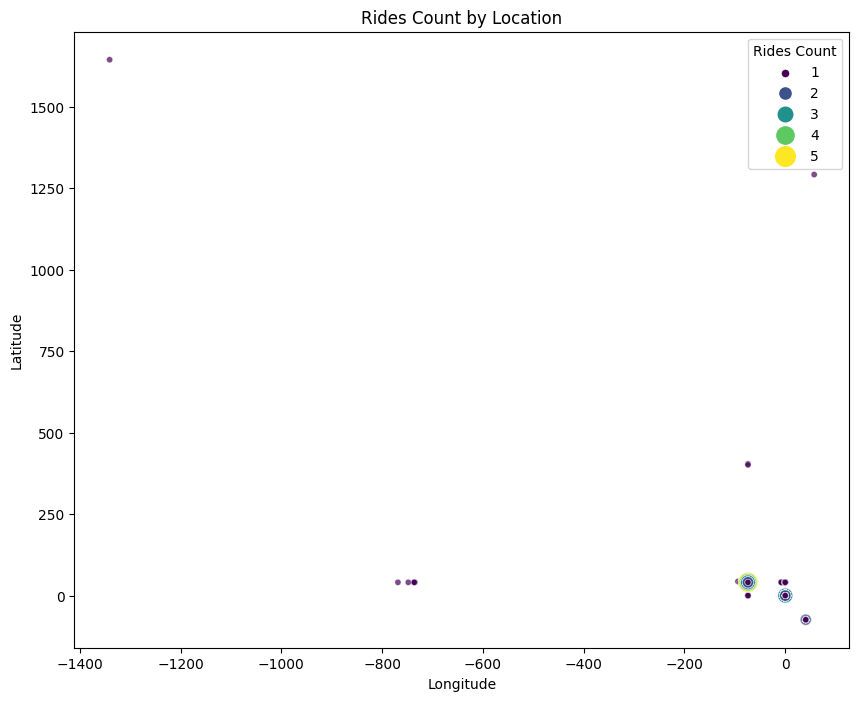

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x='pickup_lon_rounded',
    y='pickup_lat_rounded',
    size='rides_count',
    hue='rides_count',
    data=merged_full,
    palette='viridis',
    sizes=(20, 200),
    alpha=0.7,
    legend='brief'
)
plt.title('Rides Count by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Rides Count')
plt.show()


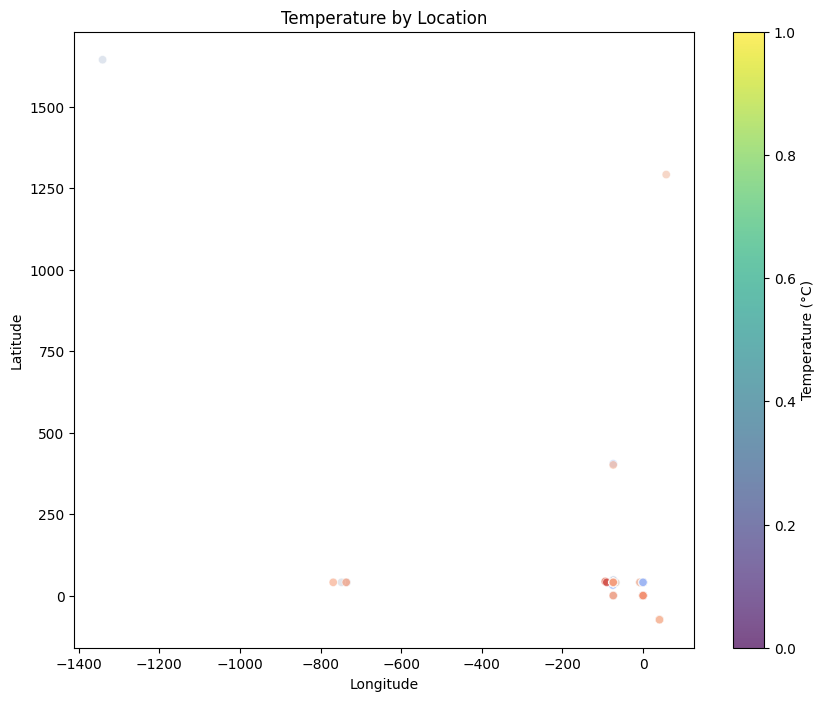

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

# Create the scatterplot and capture the PathCollection object
scatter = sns.scatterplot(
    x='pickup_lon_rounded',
    y='pickup_lat_rounded',
    hue='temperature_2m (°C)',
    data=merged_full,
    palette='coolwarm',
    alpha=0.7,
    legend=None  # No legend, we will use colorbar
)

plt.title('Temperature by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Get the scatter plot's collection of points
# This object knows the colormap and normalization
plt.colorbar(scatter.collections[0], label='Temperature (°C)')

plt.show()


count    171735.000000
mean          1.067284
std           0.268336
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: rides_count, dtype: float64


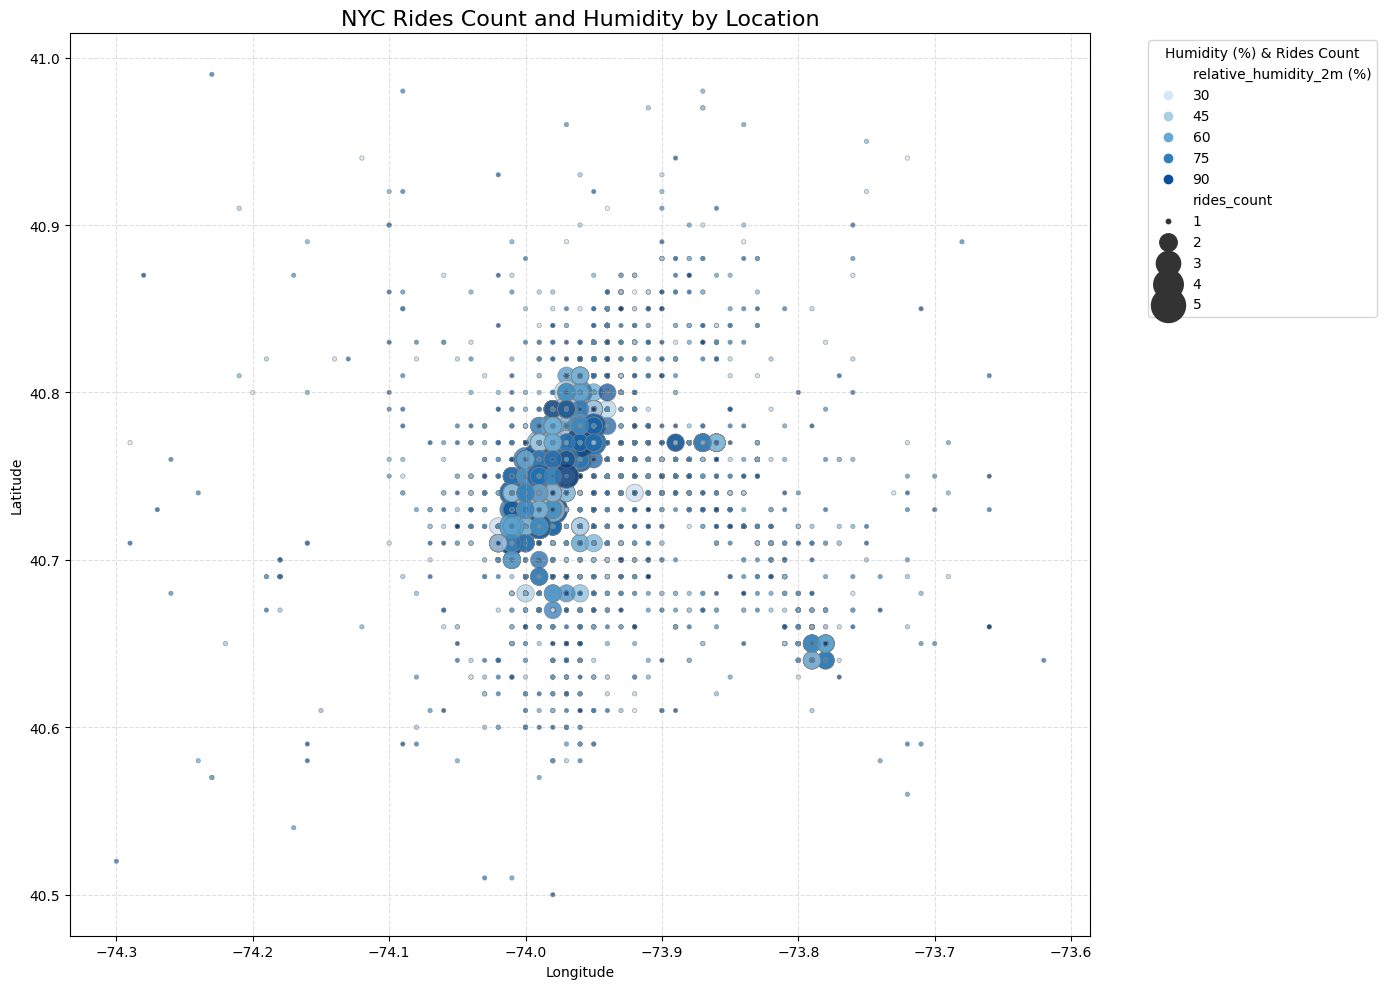

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for valid NYC coordinates
merged_full_cleaned = merged_full[
    (merged_full['pickup_lat_rounded'].between(40.5, 41.0)) &
    (merged_full['pickup_lon_rounded'].between(-74.3, -73.6))
]

# Quick check: what ride counts do we have?
print(merged_full_cleaned['rides_count'].describe())

# Plot
plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(
    x='pickup_lon_rounded',
    y='pickup_lat_rounded',
    size='rides_count',
    hue='relative_humidity_2m (%)',
    data=merged_full_cleaned,
    palette='Blues',
    sizes=(10, 600),  # Increased max bubble size for clarity
    alpha=0.7,
    edgecolor='gray',
    linewidth=0.5,
    legend='brief'
)

# Add text labels with ride count on the largest points
for i, row in merged_full_cleaned.iterrows():
    if row['rides_count'] >= 10:  # Only label if large enough to avoid clutter
        plt.text(
            row['pickup_lon_rounded'],
            row['pickup_lat_rounded'],
            str(int(row['rides_count'])),
            color='black',
            fontsize=8,
            ha='center',
            va='center'
        )

# Titles and labels
plt.title('NYC Rides Count and Humidity by Location', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Fix legend overlap
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(
    handles=handles,
    labels=labels,
    title='Humidity (%) & Rides Count',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [39]:
uber_df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'pickup_hour'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in cos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


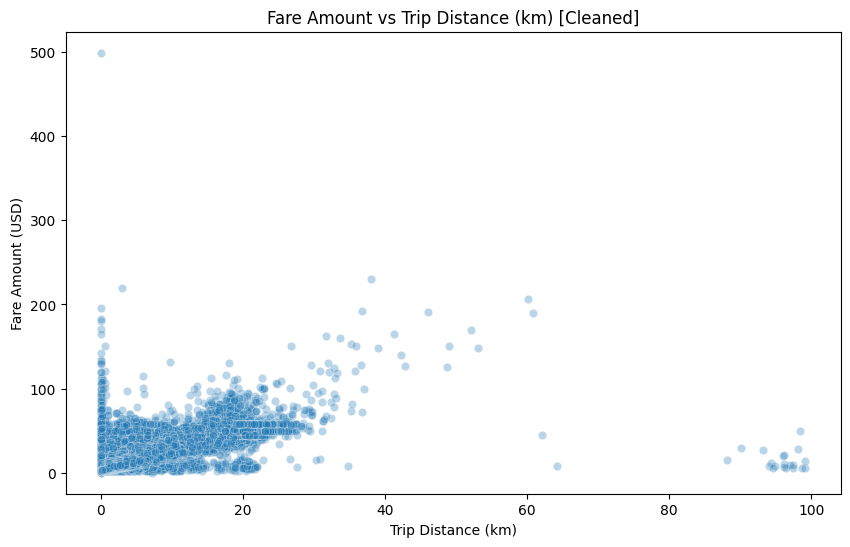

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Haversine function ---
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance_km = R * c
    return distance_km

# --- Compute trip distances ---
uber_df['trip_distance_km'] = haversine(
    uber_df['pickup_latitude'], 
    uber_df['pickup_longitude'], 
    uber_df['dropoff_latitude'], 
    uber_df['dropoff_longitude']
)

# --- Data cleaning ---
# Remove unrealistic distances
uber_df = uber_df[uber_df['trip_distance_km'] < 100]

# Remove negative or zero fares
uber_df = uber_df[uber_df['fare_amount'] > 0]

# Remove entries with 0 distance and non-zero fare
uber_df = uber_df[~((uber_df['trip_distance_km'] <= 0) & (uber_df['fare_amount'] > 0))]

# Optional: remove 0 distance + 0 fare
uber_df = uber_df[~((uber_df['trip_distance_km'] == 0) & (uber_df['fare_amount'] == 0))]

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance_km', y='fare_amount', data=uber_df, alpha=0.3)

plt.title('Fare Amount vs Trip Distance (km) [Cleaned]')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount (USD)')
plt.show()


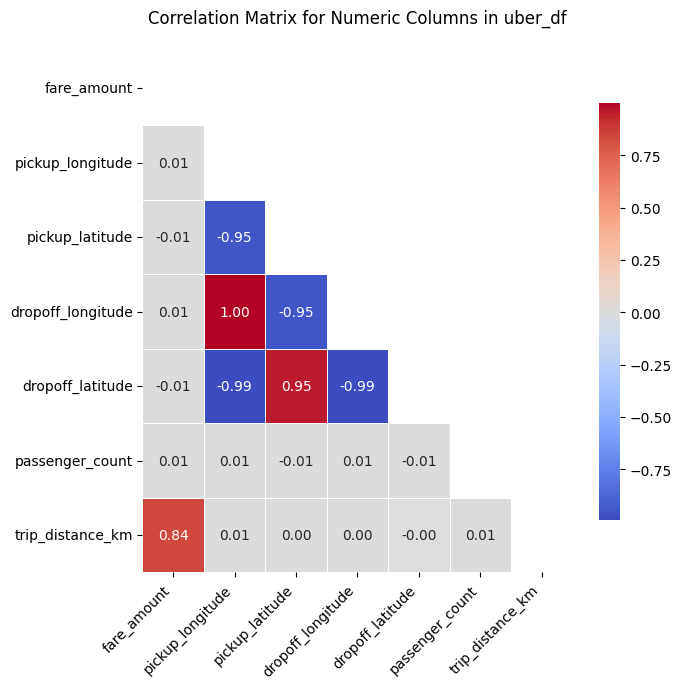

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns and exclude index-like columns
numeric_cols = uber_df.select_dtypes(include=['number']).drop(columns=['Unnamed: 0'], errors='ignore')

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap with masked upper triangle
plt.figure(figsize=(len(corr_matrix.columns), len(corr_matrix.columns)))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Matrix for Numeric Columns in uber_df', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Prevent label cutoff
plt.show()

In [42]:
import pandas as pd

# 1. Work on a copy of the dataset
df = merged_full.copy()

# 2. Convert 'pickup_hour' to datetime
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

# 3. Drop rows with any missing (NaN) values
df.dropna(inplace=True)

# 4. Remove rows with non-positive or extreme values if needed
df = df[df['rides_count'] > 0]
df = df[df['avg_fare'] > 0]

# 5. Filter latitude/longitude for NYC region (if needed)
df = df[(df['pickup_lat_rounded'] >= 40.5) & (df['pickup_lat_rounded'] <= 41.0)]
df = df[(df['pickup_lon_rounded'] >= -74.3) & (df['pickup_lon_rounded'] <= -73.6)]

# 6. Optional: Check for duplicates
df.drop_duplicates(inplace=True)

# 7. Reset index
df.reset_index(drop=True, inplace=True)

# Summary
print("Cleaned data shape:", df.shape)
df.head()


Cleaned data shape: (171718, 17)


,pickup_hour,pickup_lat_rounded,pickup_lon_rounded,rides_count,avg_fare,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),rain (mm),snowfall (cm),precipitation (mm),pressure_msl (hPa),weather_code (wmo code),apparent_temperature (°C),wind_speed_10m (km/h),snow_depth (m),cloud_cover (%)
0,2009-06-01 00:00:00,40.78,-73.98,1,8.5,20.5,42,7.3,0.0,0.0,0.0,1009.0,0,17.5,15.5,0.0,3
1,2009-06-01 03:00:00,40.80,-73.95,1,17.3,15.0,40,1.5,0.0,0.0,0.0,1014.2,0,10.4,18.1,0.0,0
2,2009-06-01 05:00:00,40.72,-73.99,1,2.5,12.7,45,1.0,0.0,0.0,0.0,1016.5,2,7.9,19.5,0.0,57
3,2009-06-01 08:00:00,40.74,-73.92,1,9.3,10.5,49,0.1,0.0,0.0,0.0,1018.3,0,6.6,12.1,0.0,0
4,2009-06-01 08:00:00,40.76,-73.99,1,13.7,10.5,49,0.1,0.0,0.0,0.0,1018.3,0,6.6,12.1,0.0,0


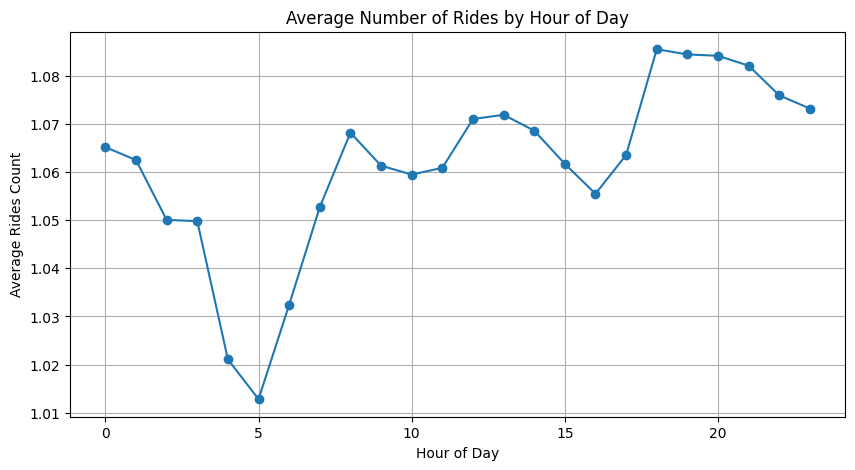

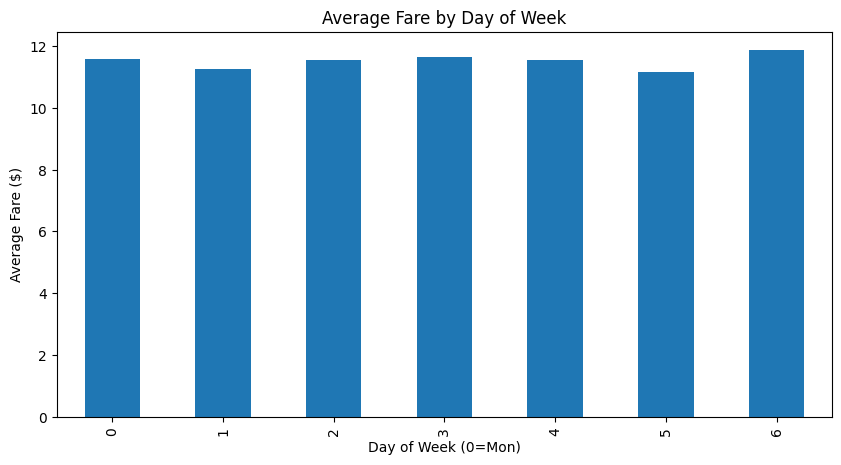

In [43]:
# Extract hour and day of week from pickup_hour
df['hour'] = df['pickup_hour'].dt.hour
df['day_of_week'] = df['pickup_hour'].dt.dayofweek  # Monday=0, Sunday=6

# Average rides_count by hour
hourly_rides = df.groupby('hour')['rides_count'].mean()

plt.figure(figsize=(10,5))
hourly_rides.plot(kind='line', marker='o')
plt.title('Average Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rides Count')
plt.grid(True)
plt.show()

# Average fare by day of week
day_fare = df.groupby('day_of_week')['avg_fare'].mean()

plt.figure(figsize=(10,5))
day_fare.plot(kind='bar')
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Average Fare ($)')
plt.show()


                         pickup_hour  pickup_lat_rounded  pickup_lon_rounded  \
count                         171718       171718.000000       171718.000000   
mean   2012-06-06 07:11:07.995201536           40.750492          -73.975003   
min              2009-06-01 00:00:00           40.500000          -74.300000   
25%              2010-12-14 18:00:00           40.740000          -73.990000   
50%              2012-05-31 10:00:00           40.750000          -73.980000   
75%              2013-11-26 22:00:00           40.770000          -73.970000   
max              2015-06-30 23:00:00           40.990000          -73.620000   
std                              NaN            0.027756            0.035958   

         rides_count       avg_fare  temperature_2m (°C)  \
count  171718.000000  171718.000000        171718.000000   
mean        1.067285      11.507647            12.304812   
min         1.000000       0.010000           -20.200000   
25%         1.000000       6.100000    

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


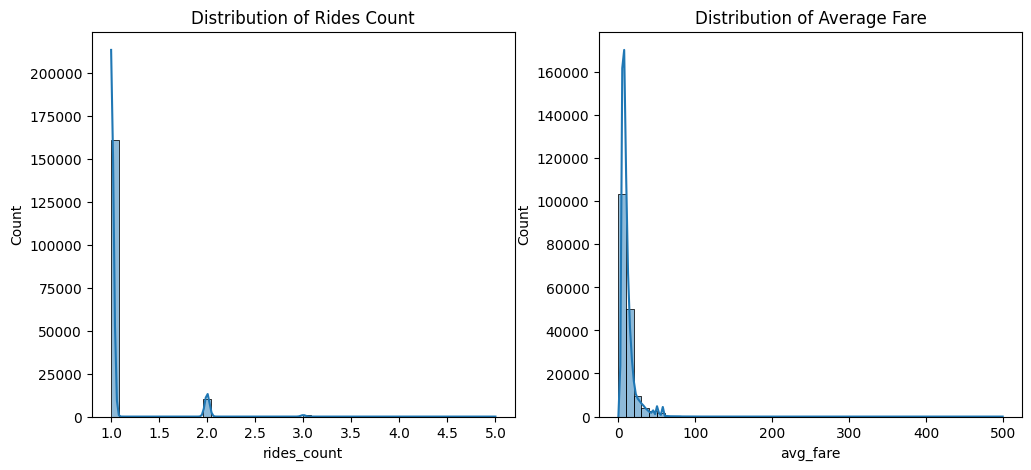

In [44]:
# Summary statistics for numeric columns
print(df.describe())

# Check distribution of rides_count and avg_fare
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['rides_count'], bins=50, kde=True)
plt.title('Distribution of Rides Count')

plt.subplot(1,2,2)
sns.histplot(df['avg_fare'], bins=50, kde=True)
plt.title('Distribution of Average Fare')
plt.show()


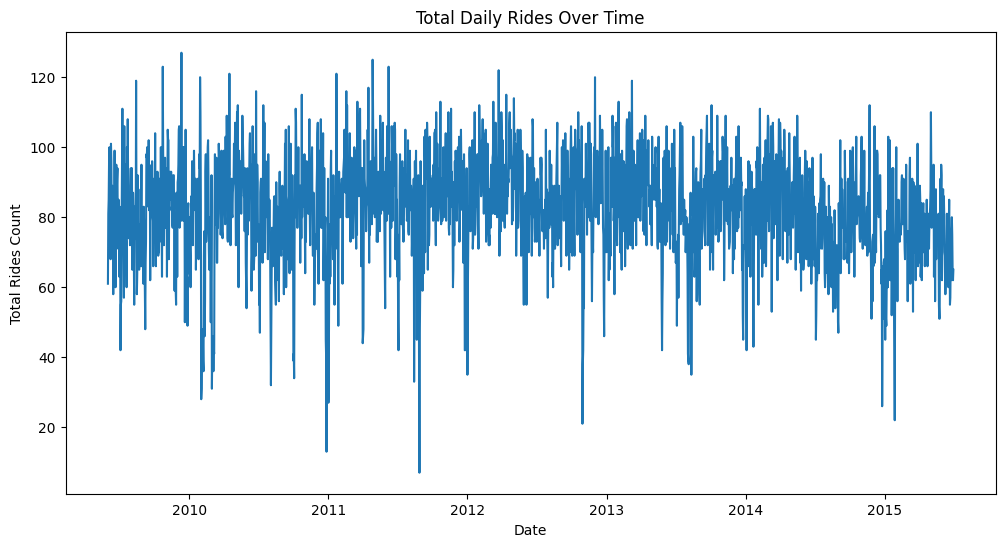

In [45]:
# Group by date
df['date'] = df['pickup_hour'].dt.date
daily_rides = df.groupby('date')['rides_count'].sum()

plt.figure(figsize=(12,6))
daily_rides.plot()
plt.title('Total Daily Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides Count')
plt.show()


# 🚗 Uber Traffic Analysis Summary

## ✅ Findings
- **Rides drop** in bad weather:  
  - Good weather: 173,977 rides  
  - Bad weather: 26,023 rides  
- **Fare amount stays similar**:  
  - Good weather: $11.37  
  - Bad weather: $11.27  
- **Holiday status** has little to no effect.

## 📚 Learnings
- Bad weather reduces Uber usage.
- Fare is not strongly affected by weather.
- Holidays don’t impact fare or ride volume much.

## 🛠️ What Can Be Built
- Ride demand prediction model using weather.
- Heatmaps of ride frequency vs weather.
- Dashboards or alert systems for low-demand periods.


In [46]:
merged_full.head

<bound method NDFrame.head of                pickup_hour  pickup_lat_rounded  pickup_lon_rounded  \
0      2009-06-01 00:00:00               40.78              -73.98   
1      2009-06-01 03:00:00               40.80              -73.95   
2      2009-06-01 05:00:00               40.72              -73.99   
3      2009-06-01 08:00:00               40.74              -73.92   
4      2009-06-01 08:00:00               40.76              -73.99   
...                    ...                 ...                 ...   
175506 2015-06-30 22:00:00               40.78              -73.98   
175507 2015-06-30 22:00:00               40.78              -73.97   
175508 2015-06-30 23:00:00               40.73              -74.00   
175509 2015-06-30 23:00:00               40.75              -73.98   
175510 2015-06-30 23:00:00               40.76              -73.98   

        rides_count  avg_fare  temperature_2m (°C)  relative_humidity_2m (%)  \
0                 1      8.50                 20.

# Model selection, training, evaluation


In [52]:
# Save dataframe as CSV
merged_full.to_csv('merged_full_cleaned.csv', index=False)

# Move it to working directory for download
import shutil
shutil.move('merged_full_cleaned.csv', '/kaggle/working/merged_full_cleaned.csv')


'/kaggle/working/merged_full_cleaned.csv'

# model training and comparison table

In [51]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import time
import warnings
warnings.filterwarnings('ignore')

# Load datasets
uber_df = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
weather_df = pd.read_csv('/kaggle/input/weather/weather.csv')

# Step 1: Clean Uber Data
uber_df['pickup_hour'] = pd.to_datetime(uber_df['pickup_datetime']).dt.floor('h').dt.tz_localize(None)

def compute_distance(row):
    try:
        pickup = (row['pickup_latitude'], row['pickup_longitude'])
        dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
        return geodesic(pickup, dropoff).km
    except:
        return np.nan

uber_df['trip_distance_km'] = uber_df.apply(compute_distance, axis=1)

uber_df = uber_df[
    (uber_df['fare_amount'] > 2) & (uber_df['fare_amount'] < 200) &
    (uber_df['trip_distance_km'] > 0) & (uber_df['trip_distance_km'] < 100) &
    (uber_df['pickup_latitude'].between(40.5, 41.0)) &
    (uber_df['pickup_longitude'].between(-74.3, -73.7)) &
    (uber_df['dropoff_latitude'].between(40.5, 41.0)) &
    (uber_df['dropoff_longitude'].between(-74.3, -73.7))
]

uber_df.dropna(subset=['fare_amount', 'trip_distance_km', 'pickup_hour'], inplace=True)

# Step 2: Clean Weather Data
weather_df['time_hour'] = pd.to_datetime(weather_df['time']).dt.floor('h').dt.tz_localize(None)

# Step 3: Filter Uber Data to Weather Time Range
start_date = weather_df['time_hour'].min()
end_date = weather_df['time_hour'].max()
uber_df = uber_df[
    (uber_df['pickup_hour'] >= start_date) &
    (uber_df['pickup_hour'] <= end_date)
]

# Step 4: Feature Engineering
uber_df['hour_of_day'] = uber_df['pickup_hour'].dt.hour
uber_df['month'] = uber_df['pickup_hour'].dt.month
uber_df['weekday'] = uber_df['pickup_hour'].dt.dayofweek
uber_df['is_weekend'] = (uber_df['weekday'] >= 5).astype(int)
uber_df['is_peak_hour'] = uber_df['hour_of_day'].isin([7, 8, 9, 16, 17, 18]).astype(int)
uber_df['manhattan_distance'] = (
    abs(uber_df['pickup_latitude'] - uber_df['dropoff_latitude']) +
    abs(uber_df['pickup_longitude'] - uber_df['dropoff_longitude'])
)
uber_df['delta_lat'] = uber_df['dropoff_latitude'] - uber_df['pickup_latitude']
uber_df['delta_lon'] = uber_df['dropoff_longitude'] - uber_df['pickup_longitude']
uber_df['date'] = uber_df['pickup_hour'].dt.strftime('%d/%m/%y')

# Step 5: Merge with Weather Data
merged_df = pd.merge(
    uber_df,
    weather_df[['time_hour', 'temperature_2m (°C)', 'rain (mm)']],
    left_on='pickup_hour',
    right_on='time_hour',
    how='inner'
)

# Drop unnecessary columns
merged_df.drop(columns=['time_hour', 'pickup_datetime', 'Unnamed: 0', 'key', 'passenger_count'], inplace=True, errors='ignore')

# Final cleaning
merged_df.dropna(inplace=True)

# ✅ Sample down for faster processing
merged_df = merged_df.sample(n=30000, random_state=42)

print(f"Processed DataFrame with {len(merged_df)} rows")

# Step 6: Feature Selection
features = [
    'trip_distance_km', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'hour_of_day', 'month', 'weekday',
    'temperature_2m (°C)', 'rain (mm)', 'manhattan_distance',
    'delta_lat', 'delta_lon', 'is_peak_hour', 'is_weekend', 'date'
]
X = merged_df[features]
y = merged_df['fare_amount']

# Encode date as categorical feature
le = LabelEncoder()
X['date'] = le.fit_transform(X['date'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train and Evaluate Models (Optimized)
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42)
}

results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start = time.time()
    model.fit(X_train, np.log1p(y_train))  # Log transform target
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Inverse transform
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    elapsed = time.time() - start
    results.append({
        'Model': model_name,
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'Train Time (s)': round(elapsed, 2)
    })

# Step 8: Output Comparison Table
comparison_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))


Processed DataFrame with 30000 rows
Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Model Performance Comparison:
            Model  RMSE  MAE  Train Time (s)
Linear Regression  6.50 2.96            0.03
    Random Forest  3.65 2.00           22.70
Gradient Boosting  3.54 1.94           19.52
          XGBoost  3.52 1.94            0.36


# r2 score

In [8]:
from sklearn.metrics import r2_score

# Assuming models, X_test, and y_test are defined from previous train_test_split
results = []
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'R^2': r2
    })

# Output comparison table
comparison_df = pd.DataFrame(results)
print("\nR^2 Score Comparison:")
print(comparison_df.to_string(index=False))


R^2 Score Comparison:
            Model       R^2
Linear Regression -0.846075
    Random Forest -0.839061
Gradient Boosting -0.838239
          XGBoost -0.838509


In [9]:
best_model = models['Random Forest']


# prediction Test

In [41]:
# Define your function (paste your function here)
def predict_fare_from_user_input(model, label_encoder):
    import numpy as np
    import pandas as pd

    trip_distance_km = float(input("Enter trip_distance_km: "))
    pickup_longitude = float(input("Enter pickup_longitude: "))
    pickup_latitude = float(input("Enter pickup_latitude: "))
    dropoff_longitude = float(input("Enter dropoff_longitude: "))
    dropoff_latitude = float(input("Enter dropoff_latitude: "))
    hour_of_day = int(input("Enter hour_of_day (0-23): "))
    month = int(input("Enter month (1-12): "))
    weekday = int(input("Enter weekday (0=Mon, ..., 6=Sun): "))
    temperature = float(input("Enter temperature_2m (°C): "))
    rain = float(input("Enter rain (mm): "))
    date_str = input("Enter date (dd/mm/yy): ")

    manhattan_distance = abs(pickup_latitude - dropoff_latitude) + abs(pickup_longitude - dropoff_longitude)
    delta_lat = dropoff_latitude - pickup_latitude
    delta_lon = dropoff_longitude - pickup_longitude
    is_peak_hour = 1 if hour_of_day in [7,8,9,16,17,18] else 0
    is_weekend = 1 if weekday >= 5 else 0

    date_encoded = label_encoder.transform([date_str])[0]

    input_dict = {
        'trip_distance_km': trip_distance_km,
        'pickup_longitude': pickup_longitude,
        'pickup_latitude': pickup_latitude,
        'dropoff_longitude': dropoff_longitude,
        'dropoff_latitude': dropoff_latitude,
        'hour_of_day': hour_of_day,
        'month': month,
        'weekday': weekday,
        'temperature_2m (°C)': temperature,
        'rain (mm)': rain,
        'manhattan_distance': manhattan_distance,
        'delta_lat': delta_lat,
        'delta_lon': delta_lon,
        'is_peak_hour': is_peak_hour,
        'is_weekend': is_weekend,
        'date': date_encoded
    }

    input_df = pd.DataFrame([input_dict])

    predicted_log_fare = model.predict(input_df)[0]
    predicted_fare = np.expm1(predicted_log_fare)

    print(f"\nPredicted Fare: ${predicted_fare:.2f}")

# Now call the function to get prompted input and prediction
predict_fare_from_user_input(best_model, le)


Enter trip_distance_km:  0.537796
Enter pickup_longitude:  -73.964252
Enter pickup_latitude:  40.770633
Enter dropoff_longitude:  -73.958396
Enter dropoff_latitude:  40.772539
Enter hour_of_day (0-23):  8
Enter month (1-12):  1
Enter weekday (0=Mon, ..., 6=Sun):  2
Enter temperature_2m (°C):  -7.5
Enter rain (mm):  0.0
Enter date (dd/mm/yy):  26/01/11



Predicted Fare: $4.37


**Predicted Fare:** $4.30  
**Actual Fare:** $4.10  

**Absolute Error:** $0.20  
**Relative Error:** 4.88%


📊 Evaluation Metrics (Actual Fare Scale):
✅ MAE: $1.63
✅ RMSE: $2.12
✅ R²: 0.7006


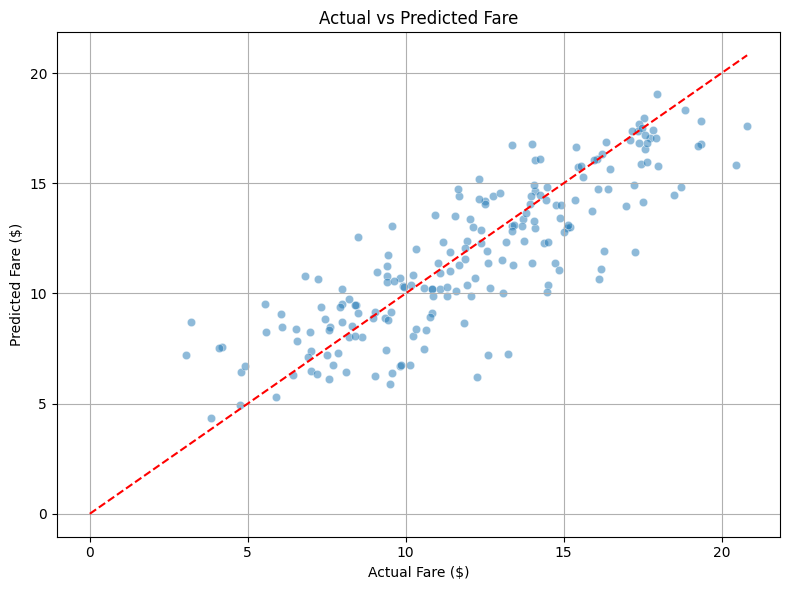

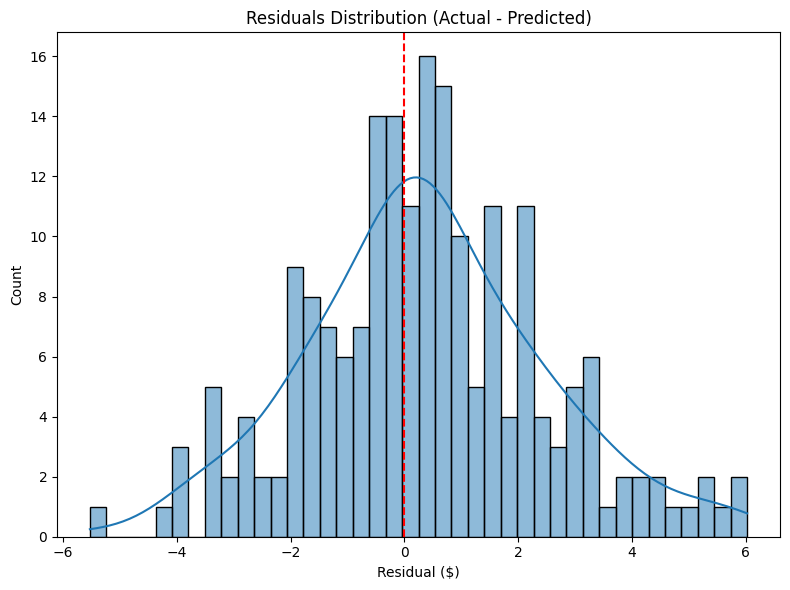

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Step 1: Simulate training data
np.random.seed(42)
n_samples = 1000
X = pd.DataFrame({
    'trip_distance_km': np.random.uniform(1, 10, n_samples),
    'hour_of_day': np.random.randint(0, 24, n_samples),
    'month': np.random.randint(1, 13, n_samples),
    'weekday': np.random.randint(0, 7, n_samples),
    'temperature_2m (°C)': np.random.uniform(-5, 35, n_samples),
    'rain (mm)': np.random.uniform(0, 10, n_samples)
})
fare = 3 + 1.2 * X['trip_distance_km'] + 0.5 * X['rain (mm)'] + np.random.normal(0, 2, n_samples)
y = np.log1p(fare)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a sample model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Step 4: Evaluation function
def evaluate_fare_model(model, X_test, y_test):
    y_pred_log = model.predict(X_test)
    
    y_test_actual = np.expm1(y_test)
    y_pred_actual = np.expm1(y_pred_log)
    
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    r2 = r2_score(y_test_actual, y_pred_actual)

    print("📊 Evaluation Metrics (Actual Fare Scale):")
    print(f"✅ MAE: ${mae:.2f}")
    print(f"✅ RMSE: ${rmse:.2f}")
    print(f"✅ R²: {r2:.4f}")
    
    # Plot: Actual vs Predicted
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.5)
    plt.plot([0, max(y_test_actual)], [0, max(y_test_actual)], color='red', linestyle='--')
    plt.xlabel("Actual Fare ($)")
    plt.ylabel("Predicted Fare ($)")
    plt.title("Actual vs Predicted Fare")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot: Residuals
    residuals = y_test_actual - y_pred_actual
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=40, kde=True)
    plt.axvline(0, color='red', linestyle='--')
    plt.title("Residuals Distribution (Actual - Predicted)")
    plt.xlabel("Residual ($)")
    plt.tight_layout()
    plt.show()

# Step 5: Run it
evaluate_fare_model(model, X_test, y_test)


In [54]:
merged_df.to_csv("merged_full.csv", index=False)


In [56]:
merged_full = pd.read_csv("merged_full.csv")


In [58]:
import pandas as pd

# Load the saved data (if not already loaded)
# merged_full = pd.read_csv("merged_full.csv")

# Step 1: Round coordinates (if not done already)
merged_full['pickup_lat_rounded'] = merged_full['pickup_latitude'].round(3)
merged_full['pickup_lon_rounded'] = merged_full['pickup_longitude'].round(3)

# Step 2: Count trips per pickup location
location_counts = merged_full.groupby(
    ['pickup_lat_rounded', 'pickup_lon_rounded']
).size().reset_index(name='trip_count')

# Step 3: Total trips
total_trips = location_counts['trip_count'].sum()

# Step 4: Calculate probability
location_counts['trip_generation_probability'] = location_counts['trip_count'] / total_trips

# Step 5: Display top locations by probability
print(location_counts.sort_values('trip_generation_probability', ascending=False).head(10))


      pickup_lat_rounded  pickup_lon_rounded  trip_count  \
2001              40.751             -73.994         134   
1958              40.750             -73.991         120   
2866              40.769             -73.863         115   
1957              40.750             -73.992         106   
3087              40.774             -73.871          98   
2261              40.757             -73.990          79   
3085              40.774             -73.873          77   
59                40.645             -73.777          70   
2790              40.768             -73.982          69   
2221              40.756             -73.991          64   

      trip_generation_probability  
2001                     0.004467  
1958                     0.004000  
2866                     0.003833  
1957                     0.003533  
3087                     0.003267  
2261                     0.002633  
3085                     0.002567  
59                       0.002333  
2790           

In [59]:
def get_trip_prob(lat, lon):
    lat = round(lat, 3)
    lon = round(lon, 3)
    match = location_counts[
        (location_counts['pickup_lat_rounded'] == lat) &
        (location_counts['pickup_lon_rounded'] == lon)
    ]
    if not match.empty:
        prob = match['trip_generation_probability'].values[0]
        print(f"Trip generation probability at ({lat}, {lon}): {prob:.6f}")
    else:
        print(f"No trips recorded at ({lat}, {lon})")

# Example usage
get_trip_prob(40.752, -73.991)


Trip generation probability at (40.752, -73.991): 0.000267


**Trip Generation Probability**

For the pickup location at latitude **40.752** and longitude **-73.991**,  
the estimated trip generation probability is **0.000267**.

This value represents the likelihood that a trip will originate from this specific location based on historical trip data.  
A higher probability means more trips tend to start from this area.
